#USAID FUNDING ANALYSIS
The USAID has been gving funding to entrepreneurs across the world  in different sectors. Most entrepreneurs do not know their viability because they lack information on the most funded sectors, regions and the chances of them getting another loan if they borrow a second time.
Below is an analysis of the Development_Credit_Authority__DCA__Data_Set__Loan_Transactions.csv dataset to determine the funding they give, the most funded regions and the mosts funded business sectors.



# IMPORTING THE LIBRARIES

In [0]:
# Importing pandas module
import pandas as pd
# Importing numpy module
import numpy as np
# Importing datetime
import datetime

# READING THE DATASET FILE

In [0]:
# Reading the csv file
data = 'Development_Credit_Authority__DCA__Data_Set__Loan_Transactions (2).csv'
df = pd.read_csv(data, encoding= 'latin1')

In [0]:
# Showing the first five rows of the first dataset 
df.head()

,Guarantee Number,Transaction Report ID,Guarantee Country Name,Amount (USD),Currency Name,Disbursement Date,End Date,Business Sector,City/Town,State/Province/Region Name,State/Province/Region Code,State/Province/Region Country Name,Region Name,Is Woman Owned?,Is First Time Borrower?,Business Size,Latitude,Longitude
0,099-DCA-09-006A (Asociacion Arariwa),356191,Worldwide,9.801444e+05,PERU - NUEVO SOL,09/20/2011 12:00:00 AM,09/09/2013 12:00:00 AM,NaN,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,>100,-13.518333,-71.978056
1,099-DCA-09-006B (Pro Mujer Peru),331620,Worldwide,1.960289e+06,PERU - NUEVO SOL,09/20/2011 12:00:00 AM,09/04/2014 12:00:00 AM,NaN,Puno,Puno,PE21,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,>100,-15.000000,-70.000000
2,099-DCA-09-006C (ProEmpresa),349835,Worldwide,2.007491e+06,PERU - NUEVO SOL,01/18/2012 12:00:00 AM,08/05/2013 12:00:00 AM,NaN,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,>100,-12.000000,-76.833333
3,099-DCA-09-006D (Pro Mujer Peru),385807,Worldwide,1.030888e+06,PERU - NUEVO SOL,04/11/2012 12:00:00 AM,03/31/2015 12:00:00 AM,NaN,Puno,NaN,NaN,NaN,NaN,0,0,>100,NaN,NaN
4,099-DCA-09-006F (COCLA),473058,Worldwide,1.780000e+06,UNITED STATES - DOLLAR,08/15/2012 12:00:00 AM,08/20/2014 12:00:00 AM,NaN,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,NaN,-13.518333,-71.978056


# EXPLORING THE DATASET

In [0]:
# Checking the number of columns
df.columns

Index(['Guarantee Number', 'Transaction Report ID', 'Guarantee Country Name',
       'Amount (USD)', 'Currency Name', 'Disbursement Date', 'End Date',
       'Business Sector', 'City/Town', 'State/Province/Region Name',
       'State/Province/Region Code', 'State/Province/Region Country Name',
       'Region Name', 'Is Woman Owned?', 'Is First Time Borrower?',
       'Business Size', 'Latitude', 'Longitude'],
      dtype='object')

In [0]:
# Checking the number of rows
df.index

RangeIndex(start=0, stop=186545, step=1)

In [0]:
# Checking the number of rows and columns
df.shape

(186545, 18)

In [0]:
# Getting the description of the dataset
df.describe()


,Transaction Report ID,Amount (USD),Is Woman Owned?,Is First Time Borrower?,Latitude,Longitude
count,186545.000000,1.865450e+05,186545.000000,186545.000000,106799.000000,106799.000000
mean,329994.621882,1.286414e+04,0.621748,0.720882,6.982566,-43.189297
std,159847.297026,3.827625e+05,63.448985,47.963299,14.786496,60.076571
min,18215.000000,0.000000e+00,0.000000,0.000000,-34.822297,-115.181111
25%,195994.000000,3.861004e+02,0.000000,0.000000,-5.750000,-76.851667
50%,309041.000000,8.368201e+02,0.000000,0.000000,4.649178,-75.442749
75%,468427.000000,2.001601e+03,0.000000,1.000000,17.964543,7.469140
max,658846.000000,9.500000e+07,21566.000000,10065.000000,62.366667,150.216667


In [0]:
# Getting the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186545 entries, 0 to 186544
Data columns (total 18 columns):
Guarantee Number                      186545 non-null object
Transaction Report ID                 186545 non-null int64
Guarantee Country Name                186545 non-null object
Amount (USD)                          186545 non-null float64
Currency Name                         186545 non-null object
Disbursement Date                     186545 non-null object
End Date                              186545 non-null object
Business Sector                       178564 non-null object
City/Town                             146253 non-null object
State/Province/Region Name            134854 non-null object
State/Province/Region Code            134854 non-null object
State/Province/Region Country Name    134854 non-null object
Region Name                           134854 non-null object
Is Woman Owned?                       186545 non-null int64
Is First Time Borrower?             

# DATA CLEANING

# Validity

In [0]:
# Deleting unnecesarry data
df.drop('Business Size', axis=1, inplace=True)

In [0]:
df.drop('Latitude', axis=1, inplace=True)

In [0]:
df.drop('Longitude', axis=1, inplace=True)

In [0]:
df.columns

Index(['Guarantee Number', 'Transaction Report ID', 'Guarantee Country Name',
       'Amount (USD)', 'Currency Name', 'Disbursement Date', 'End Date',
       'Business Sector', 'City/Town', 'State/Province/Region Name',
       'State/Province/Region Code', 'State/Province/Region Country Name',
       'Region Name', 'Is Woman Owned?', 'Is First Time Borrower?'],
      dtype='object')

# Accuracy

In [0]:
# changing the format of Disbursement Date and End Date
df['Disbursement Date'] = pd.to_datetime(df['Disbursement Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

In [0]:
def check(row):
  if row['Disbursement Date'] < row['End Date']:
    return True
  else:
    return False

In [0]:
df['verifier'] = df.apply(lambda row:check(row), axis=1)
df.tail()

,Guarantee Number,Transaction Report ID,Guarantee Country Name,Amount (USD),Currency Name,Disbursement Date,End Date,Business Sector,City/Town,State/Province/Region Name,State/Province/Region Code,State/Province/Region Country Name,Region Name,Is Woman Owned?,Is First Time Borrower?,verifier
186540,620-DCA-06-001,312460,Nigeria,47602.8562,NIGERIA - NAIRA,2008-10-03,2018-02-03,Other Service,NaN,NaN,NaN,NaN,NaN,0,0,True
186541,620-DCA-06-001,312459,Nigeria,54403.2642,NIGERIA - NAIRA,2008-10-03,2018-02-03,Other Service,NaN,NaN,NaN,NaN,NaN,0,1,True
186542,620-DCA-06-001,312458,Nigeria,51003.0602,NIGERIA - NAIRA,2008-10-03,2016-10-03,Other Service,NaN,NaN,NaN,NaN,NaN,0,1,True
186543,620-DCA-06-001,312462,Nigeria,37402.2441,NIGERIA - NAIRA,2008-10-31,2017-10-30,Information & Communication Technologies,NaN,NaN,NaN,NaN,NaN,0,0,True
186544,620-DCA-06-001,312461,Nigeria,10200.6120,NIGERIA - NAIRA,2008-10-31,2017-10-30,Other Service,NaN,NaN,NaN,NaN,NaN,0,0,True


# Completeness

In [0]:
# Checking for null values
df.isnull().any()

Guarantee Number                      False
Transaction Report ID                 False
Guarantee Country Name                False
Amount (USD)                          False
Currency Name                         False
Disbursement Date                     False
End Date                              False
Business Sector                        True
City/Town                              True
State/Province/Region Name             True
State/Province/Region Code             True
State/Province/Region Country Name     True
Region Name                            True
Is Woman Owned?                       False
Is First Time Borrower?               False
verifier                              False
dtype: bool

In [0]:
df.isnull().sum()

Guarantee Number                          0
Transaction Report ID                     0
Guarantee Country Name                    0
Amount (USD)                              0
Currency Name                             0
Disbursement Date                         0
End Date                                  0
Business Sector                        2481
City/Town                             18031
State/Province/Region Name            25904
State/Province/Region Code            25904
State/Province/Region Country Name    25904
Region Name                           25904
Is Woman Owned?                           1
Is First Time Borrower?                   1
verifier                                  0
dtype: int64

In [0]:
df.shape

(186545, 16)

In [0]:
# Checking for the mode of the columns with missing values
df.loc[:, 'Is First Time Borrower?'].mode()

0    0
dtype: int64

In [0]:
# Checking for the mode of the columns with missing values
df.loc[:, 'Business Sector'].mode()

0    Agriculture
dtype: object

In [0]:
# Checking for the mode of the columns with missing values
df.loc[:, 'Is Woman Owned?'].mode()

0    0
dtype: int64

In [0]:
#Filling the missing values with the mode value
df['Business Sector']=df['Business Sector'].fillna('Agriculture')

In [0]:
#Filling the missing values with the mode value
df['Is First Time Borrower?']=df['Is First Time Borrower?'].fillna(0.0)

In [0]:
#Filling the missing values with the mode value
df['Is Woman Owned?']=df['Is Woman Owned?'].fillna(0.0)

In [0]:
#Checking for missing values
df.isnull().sum()

Guarantee Number                          0
Transaction Report ID                     0
Guarantee Country Name                    0
Amount (USD)                              0
Currency Name                             0
Disbursement Date                         0
End Date                                  0
Business Sector                           0
City/Town                             40292
State/Province/Region Name            51691
State/Province/Region Code            51691
State/Province/Region Country Name    51691
Region Name                           51691
Is Woman Owned?                           0
Is First Time Borrower?                   0
verifier                                  0
dtype: int64

In [0]:
#Dropping the columns with many missing values
df=df.dropna()


In [0]:
#Confirming the number of columns and rows after dropping columns with many missing values
df.shape

(134854, 16)

In [0]:
#Checking if the columns have any more missing values
df.isnull().sum()

Guarantee Number                      0
Transaction Report ID                 0
Guarantee Country Name                0
Amount (USD)                          0
Currency Name                         0
Disbursement Date                     0
End Date                              0
Business Sector                       0
City/Town                             0
State/Province/Region Name            0
State/Province/Region Code            0
State/Province/Region Country Name    0
Region Name                           0
Is Woman Owned?                       0
Is First Time Borrower?               0
verifier                              0
dtype: int64

#SHARON

# Consistency

In [0]:
# Checking for duplicates
df.duplicated().any()

False

# Uniformity

In [0]:
# I have changed two column in accuracy to datetime format

In [0]:
# Changing all the columns to lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [0]:
df.columns

Index(['guarantee_number', 'transaction_report_id', 'guarantee_country_name',
       'amount_usd', 'currency_name', 'disbursement_date', 'end_date',
       'business_sector', 'city/town', 'state/province/region_name',
       'state/province/region_code', 'state/province/region_country_name',
       'region_name', 'is_woman_owned?', 'is_first_time_borrower?',
       'verifier'],
      dtype='object')

In [0]:
#Changing the datatype of amount_usd column to float
df['amount_usd'] = df['amount_usd'].astype(int)

In [0]:
#Confirming that the datatype of the amoUunt_usd column has been successfully changed to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134854 entries, 0 to 134853
Data columns (total 16 columns):
guarantee_number                      134854 non-null object
transaction_report_id                 134854 non-null int64
guarantee_country_name                134854 non-null object
amount_usd                            134854 non-null int64
currency_name                         134854 non-null object
disbursement_date                     134854 non-null object
end_date                              134854 non-null object
business_sector                       134854 non-null object
city/town                             134854 non-null object
state/province/region_name            134854 non-null object
state/province/region_code            134854 non-null object
state/province/region_country_name    134854 non-null object
region_name                           134854 non-null object
is_woman_owned?                       134854 non-null int64
is_first_time_borrower?               

# Exporting the clean dataset

In [0]:
import pandas as pd
import numpy as np
import datetime 

df.to_csv('CleanTings.csv')

In [0]:
# Downloading the csv
from google.colab import files
files.download("CleanTings.csv")

In [0]:
df = pd.read_csv('CleanTings.csv', encoding='utf-8')
df.head()

,Unnamed: 0,guarantee_number,transaction_report_id,guarantee_country_name,amount_usd,currency_name,disbursement_date,end_date,business_sector,city/town,state/province/region_name,state/province/region_code,state/province/region_country_name,region_name,is_woman_owned?,is_first_time_borrower?,verifier
0,0,099-DCA-09-006A (Asociacion Arariwa),356191,Worldwide,980144,PERU - NUEVO SOL,2011-09-20,2013-09-09,Agriculture,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,True
1,1,099-DCA-09-006B (Pro Mujer Peru),331620,Worldwide,1960288,PERU - NUEVO SOL,2011-09-20,2014-09-04,Agriculture,Puno,Puno,PE21,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True
2,2,099-DCA-09-006C (ProEmpresa),349835,Worldwide,2007490,PERU - NUEVO SOL,2012-01-18,2013-08-05,Agriculture,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,True
3,3,099-DCA-09-006F (COCLA),473058,Worldwide,1780000,UNITED STATES - DOLLAR,2012-08-15,2014-08-20,Agriculture,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True
4,4,099-DCA-09-006G (Manuela Ramos),420674,Worldwide,1158301,PERU - NUEVO SOL,2012-11-28,2014-11-28,Agriculture,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True


In [0]:
#Dropping 'unnamed: 0' column
df.drop('Unnamed: 0', axis=1, inplace= True)


In [0]:
df.head()

,guarantee_number,transaction_report_id,guarantee_country_name,amount_usd,currency_name,disbursement_date,end_date,business_sector,city/town,state/province/region_name,state/province/region_code,state/province/region_country_name,region_name,is_woman_owned?,is_first_time_borrower?,verifier
0,099-DCA-09-006A (Asociacion Arariwa),356191,Worldwide,980144,PERU - NUEVO SOL,2011-09-20,2013-09-09,Agriculture,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,True
1,099-DCA-09-006B (Pro Mujer Peru),331620,Worldwide,1960288,PERU - NUEVO SOL,2011-09-20,2014-09-04,Agriculture,Puno,Puno,PE21,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True
2,099-DCA-09-006C (ProEmpresa),349835,Worldwide,2007490,PERU - NUEVO SOL,2012-01-18,2013-08-05,Agriculture,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,True
3,099-DCA-09-006F (COCLA),473058,Worldwide,1780000,UNITED STATES - DOLLAR,2012-08-15,2014-08-20,Agriculture,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True
4,099-DCA-09-006G (Manuela Ramos),420674,Worldwide,1158301,PERU - NUEVO SOL,2012-11-28,2014-11-28,Agriculture,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True


## ABEL

In [0]:
# sum of amount per currency
df1=df.groupby(pd.Grouper(('currency_name')))
df2 =df1['amount_usd'].sum()
df2

currency_name
PERU - NUEVO SOL                    39857696
UNITED STATES - DOLLAR             309844505
SOUTH AFRICA - RAND                 62485920
MADAGASCAR - ARIARY                   409660
NIGERIA - NAIRA                     14638027
                                     ...    
ZAMBIA - NEW KWACHA                   392653
BULGARIA - LEV                      10471389
SERBIA MONTENEGRO - DINAR            5873984
GRENADA - EAST CARIBBEAN DOLLAR      3929955
BOSNIA-HERCEGOVINA DO NOT USE       25171477
Name: amount_usd, Length: 74, dtype: int64

In [0]:
# Determining the amount of times a currency was used
df1=df.groupby(pd.Grouper(('currency_name'))).count()
df2 =df1['amount_usd']
df2

currency_name
PERU - NUEVO SOL                   21424
UNITED STATES - DOLLAR              7058
SOUTH AFRICA - RAND                  268
MADAGASCAR - ARIARY                   13
NIGERIA - NAIRA                      666
                                   ...  
ZAMBIA - NEW KWACHA                    1
BULGARIA - LEV                        77
SERBIA MONTENEGRO - DINAR              4
GRENADA - EAST CARIBBEAN DOLLAR       86
BOSNIA-HERCEGOVINA DO NOT USE        160
Name: amount_usd, Length: 74, dtype: int64

In [0]:
# Min of amount per currency
df1=df.groupby(pd.Grouper(('currency_name')))
df2 =df1['amount_usd'].min()
df2

currency_name
PERU - NUEVO SOL                        0
UNITED STATES - DOLLAR                  0
SOUTH AFRICA - RAND                  4546
MADAGASCAR - ARIARY                  1583
NIGERIA - NAIRA                         0
                                    ...  
ZAMBIA - NEW KWACHA                392653
BULGARIA - LEV                          0
SERBIA MONTENEGRO - DINAR          947409
GRENADA - EAST CARIBBEAN DOLLAR       740
BOSNIA-HERCEGOVINA DO NOT USE       18691
Name: amount_usd, Length: 74, dtype: int64

In [0]:
# maximum amount per currency
df1=df.groupby(pd.Grouper(('currency_name')))
df2 =df1['amount_usd'].max()
df2

currency_name
PERU - NUEVO SOL                    2007490
UNITED STATES - DOLLAR             60000000
SOUTH AFRICA - RAND                 9806547
MADAGASCAR - ARIARY                  138419
NIGERIA - NAIRA                      997229
                                     ...   
ZAMBIA - NEW KWACHA                  392653
BULGARIA - LEV                      1324265
SERBIA MONTENEGRO - DINAR           1988667
GRENADA - EAST CARIBBEAN DOLLAR     1254074
BOSNIA-HERCEGOVINA DO NOT USE       1086965
Name: amount_usd, Length: 74, dtype: int64

In [0]:
# Skewness of amounts
df1=df.groupby(pd.Grouper(('currency_name'))).skew()
df2 =df1['amount_usd']
df2

currency_name
PERU - NUEVO SOL                   74.907503
UNITED STATES - DOLLAR             76.297093
SOUTH AFRICA - RAND                 9.029981
MADAGASCAR - ARIARY                 1.798836
NIGERIA - NAIRA                     7.619767
                                     ...    
ZAMBIA - NEW KWACHA                      NaN
BULGARIA - LEV                      3.450887
SERBIA MONTENEGRO - DINAR          -0.000289
GRENADA - EAST CARIBBEAN DOLLAR     7.016196
BOSNIA-HERCEGOVINA DO NOT USE       2.776258
Name: amount_usd, Length: 74, dtype: float64

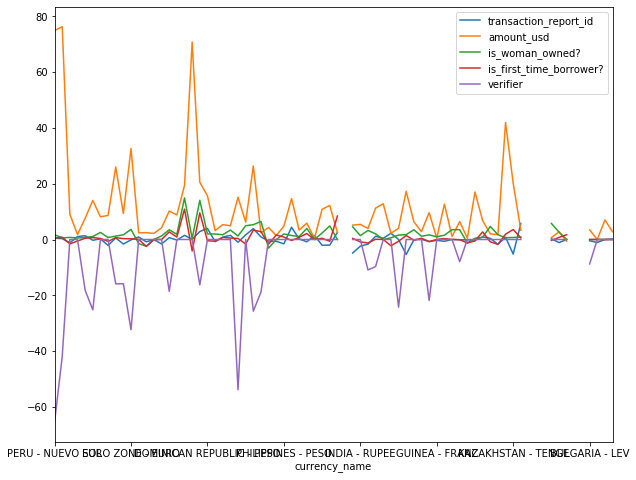

In [0]:
df1=df.groupby(pd.Grouper(('currency_name'))).skew().plot(figsize=(10,8))

In [0]:
# variance of amount_usd
df1=df.groupby(pd.Grouper(('currency_name')))
df2 =df1['amount_usd'].var()
df2

currency_name
PERU - NUEVO SOL                   5.066074e+08
UNITED STATES - DOLLAR             5.446059e+11
SOUTH AFRICA - RAND                8.003475e+11
MADAGASCAR - ARIARY                1.629846e+09
NIGERIA - NAIRA                    8.288069e+09
                                       ...     
ZAMBIA - NEW KWACHA                         NaN
BULGARIA - LEV                     4.966398e+10
SERBIA MONTENEGRO - DINAR          3.404787e+11
GRENADA - EAST CARIBBEAN DOLLAR    2.179561e+10
BOSNIA-HERCEGOVINA DO NOT USE      3.555767e+10
Name: amount_usd, Length: 74, dtype: float64

In [0]:
# standard deviation of amount_usd
df1=df.groupby(pd.Grouper(('currency_name')))
df2 =df1['amount_usd'].std()
df2

currency_name
PERU - NUEVO SOL                    22507.941102
UNITED STATES - DOLLAR             737974.178741
SOUTH AFRICA - RAND                894621.450353
MADAGASCAR - ARIARY                 40371.348711
NIGERIA - NAIRA                     91038.833730
                                       ...      
ZAMBIA - NEW KWACHA                          NaN
BULGARIA - LEV                     222854.173359
SERBIA MONTENEGRO - DINAR          583505.552150
GRENADA - EAST CARIBBEAN DOLLAR    147633.379313
BOSNIA-HERCEGOVINA DO NOT USE      188567.403471
Name: amount_usd, Length: 74, dtype: float64

In [0]:
# highest currency granted as loan per region
df1=pd.pivot_table(df, index=['currency_name','region_name'],values="amount_usd",aggfunc='max',fill_value=0)
df1.sort_values(by='amount_usd', ascending=0).head(5)

,,amount_usd
currency_name,region_name,
UNITED STATES - DOLLAR,AFRICA,60000000
INDIA - RUPEE,ASIA,15466137
KENYA - SHILLING,AFRICA,11567379
SOUTH AFRICA - RAND,AFRICA,9806547
EURO ZONE - EURO,LATIN AMERICA & THE CARIBBEAN,9707031


# LEAH

In [0]:
# Number of business_sectors per region

df1=pd.pivot_table(df, index=['region_name'],values="business_sector",aggfunc='count',fill_value=0)
df1.sort_values(by='business_sector', ascending=0).head(5)

,business_sector
region_name,
LATIN AMERICA & THE CARIBBEAN,94817
ASIA,15614
AFRICA,14925
EUROPE & EURASIA,9395
MIDDLE EAST,103


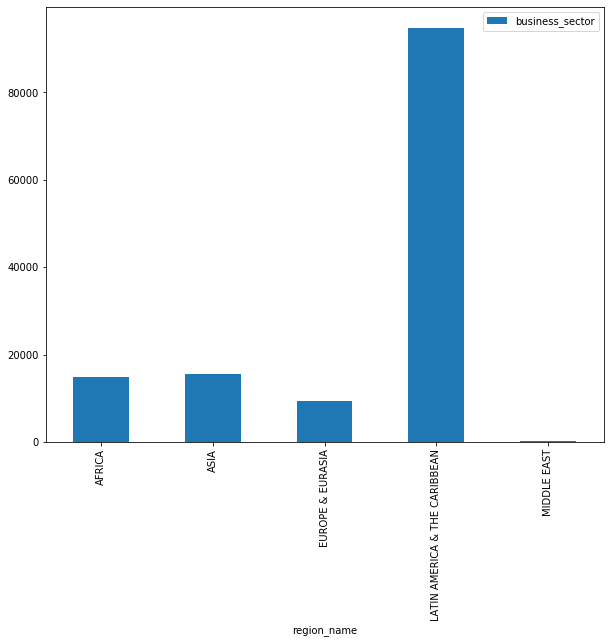

In [0]:
#@title Default title text
df1=pd.pivot_table(df, index=['region_name'],values="business_sector",aggfunc='count',fill_value=0).plot.bar(figsize=(10,8))

In [0]:
# extrating the year value from the disbursement date column
df['year'] = pd.DatetimeIndex(df['disbursement_date']).year
df.head()

,guarantee_number,transaction_report_id,guarantee_country_name,amount_usd,currency_name,disbursement_date,end_date,business_sector,city/town,state/province/region_name,state/province/region_code,state/province/region_country_name,region_name,is_woman_owned?,is_first_time_borrower?,verifier,year
0,099-DCA-09-006A (Asociacion Arariwa),356191,Worldwide,980144,PERU - NUEVO SOL,2011-09-20,2013-09-09,Agriculture,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,True,2011
1,099-DCA-09-006B (Pro Mujer Peru),331620,Worldwide,1960288,PERU - NUEVO SOL,2011-09-20,2014-09-04,Agriculture,Puno,Puno,PE21,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True,2011
2,099-DCA-09-006C (ProEmpresa),349835,Worldwide,2007490,PERU - NUEVO SOL,2012-01-18,2013-08-05,Agriculture,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,True,2012
3,099-DCA-09-006F (COCLA),473058,Worldwide,1780000,UNITED STATES - DOLLAR,2012-08-15,2014-08-20,Agriculture,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True,2012
4,099-DCA-09-006G (Manuela Ramos),420674,Worldwide,1158301,PERU - NUEVO SOL,2012-11-28,2014-11-28,Agriculture,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True,2012


In [0]:
# number of bussiness sectors per year
df1=pd.pivot_table(df, index=['year'],values="business_sector",aggfunc='count',fill_value=0)
df1.sort_values(by='business_sector', ascending=0).head(5)


,business_sector
year,
2006,15968
2014,15436
2012,15188
2011,13550
2013,10942


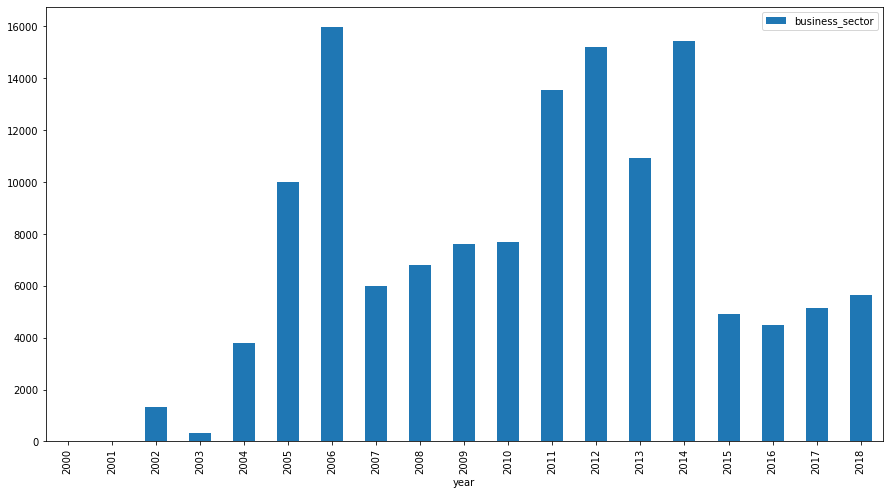

In [0]:
df1.plot.bar(figsize=(15,8))

In [0]:
# duration of the repayment period
df['end_date'] = pd.to_datetime(df['end_date'])
df['disbursement_date'] = pd.to_datetime(df['disbursement_date'])
df['date diff'] =  df['end_date'] - df['disbursement_date']
df

,guarantee_number,transaction_report_id,guarantee_country_name,amount_usd,currency_name,disbursement_date,end_date,business_sector,city/town,state/province/region_name,state/province/region_code,state/province/region_country_name,region_name,is_woman_owned?,is_first_time_borrower?,verifier,year,date diff
0,099-DCA-09-006A (Asociacion Arariwa),356191,Worldwide,980144,PERU - NUEVO SOL,2011-09-20,2013-09-09,Agriculture,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,True,2011,720 days
1,099-DCA-09-006B (Pro Mujer Peru),331620,Worldwide,1960288,PERU - NUEVO SOL,2011-09-20,2014-09-04,Agriculture,Puno,Puno,PE21,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True,2011,1080 days
2,099-DCA-09-006C (ProEmpresa),349835,Worldwide,2007490,PERU - NUEVO SOL,2012-01-18,2013-08-05,Agriculture,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,0,1,True,2012,565 days
3,099-DCA-09-006F (COCLA),473058,Worldwide,1780000,UNITED STATES - DOLLAR,2012-08-15,2014-08-20,Agriculture,Cusco,Cusco,PE08,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True,2012,735 days
4,099-DCA-09-006G (Manuela Ramos),420674,Worldwide,1158301,PERU - NUEVO SOL,2012-11-28,2014-11-28,Agriculture,Lima,Lima,PE15,Peru,LATIN AMERICA & THE CARIBBEAN,0,0,True,2012,730 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134849,620-DCA-06-001,271668,Nigeria,67998,NIGERIA - NAIRA,2008-08-01,2018-08-01,Agriculture,Abuja,Nigeria (general),NI00,Nigeria,AFRICA,0,0,True,2008,3652 days
134850,620-DCA-06-001,271670,Nigeria,67998,NIGERIA - NAIRA,2008-08-08,2014-08-08,Agriculture,Enugu,Enugu,NI47,Nigeria,AFRICA,0,0,True,2008,2191 days
134851,620-DCA-06-001,271671,Nigeria,67998,NIGERIA - NAIRA,2008-08-11,2018-08-11,Agriculture,Onitsha,Anambra,NI25,Nigeria,AFRICA,0,0,True,2008,3652 days
134852,620-DCA-06-001,271672,Nigeria,67998,NIGERIA - NAIRA,2008-08-15,2018-08-15,Agriculture,Lagos,Lagos,NI05,Nigeria,AFRICA,0,0,True,2008,3652 days


#JASLINE



In [0]:
# duration taken to pay the loan
# and the amount paid
df1=pd.pivot_table(df, index=['date diff'],values="amount_usd",aggfunc='max',fill_value=0)
df1.sort_values(by='amount_usd', ascending=0).head()

,amount_usd
date diff,
2554 days,60000000
3562 days,15466137
689 days,11784084
2191 days,11567379
1827 days,9806547


In [0]:
#Mostly funded region
df1=df.groupby(pd.Grouper(('region_name')))
df2=df1['amount_usd'].sum().sort_values
df2

<bound method Series.sort_values of region_name
LATIN AMERICA & THE CARIBBEAN    366709337
AFRICA                           510363823
EUROPE & EURASIA                 254025198
ASIA                             256671590
MIDDLE EAST                       30218611
Name: amount_usd, dtype: int64>

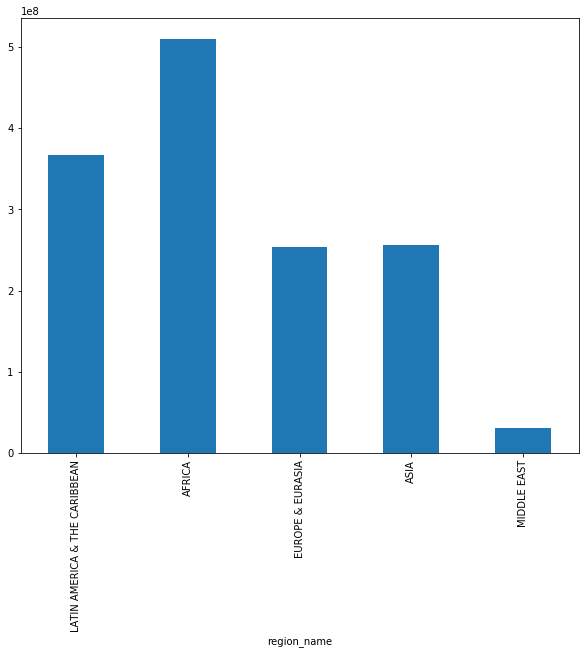

In [0]:
#Mostly funded region
df1=df.groupby(pd.Grouper(('region_name')))
df2=df1['amount_usd'].sum()
df2.plot.bar(figsize=(10,8))

In [0]:
#identifying the unique entries the guarantee_number column 
#
df['guarantee_number'].unique()

array(['099-DCA-09-006A (Asociacion Arariwa)',
       '099-DCA-09-006B (Pro Mujer Peru)', '099-DCA-09-006C (ProEmpresa)',
       '099-DCA-09-006F (COCLA)', '099-DCA-09-006G (Manuela Ramos)',
       '674-DCA-11-016', '687-DCA-15-001', '112-DCA-10-01A',
       '620-DCA-10-004', '521-DCA-08-05', '615-DCA-12-014',
       '663-DCA-17-013', '306-DCA-12-002', '611-DCA-08-008',
       '615-DCA-13-019 (Jamii Bora Re-Guarantee)', '669-DCA-15-003',
       'DCA617A020001', '099-DCA-14-012', '099-DCA-08-004B (Termination)',
       '442-DCA-17-002A', '099-DCA-08-004A (Terminated)',
       '111-DCA-12-009B (Terminated)', 'DCA-LA-440-006-03-001',
       '625-DCA-13-001', '522-DCA-2003-003', '663-DCA-04-001',
       '116-DCA-15-004B', 'ProArca DCA-596-0185-0300 ALPG 001E',
       '52004250300ALPG001(Terminated)', '5200425DCA01(Terminated)',
       '514-DCA-10-002', '117-DCA-LPG-03-00001', 'DCA-524-02-01',
       'ProArca DCA 596-0185-0300 ALPG 001', '517-DCA-08-001',
       '514-DCA-17-011', '654-DCA-0

In [0]:
#counting each unique entry in the column
#
df.groupby(['guarantee_number'])['guarantee_number'].count().sort_values(ascending = False)

guarantee_number
514-DCA-10-002                     17581
532-DCA-04-002                     12252
497-DCA-05-002                      8947
532-DCA-08-004                      7452
527-DCA-10-010B                     6098
                                   ...  
660-DCA-11-002                         1
391-DCA-16-002C                        1
391-DCA-16-002D                        1
656-DCA-14-007 (A) (Terminated)        1
Reserve Amount (Unallocated)           1
Name: guarantee_number, Length: 402, dtype: int64

In [0]:
#creating a unique dataframe that has the guarantee number with the most entries in the dataset
#
df_n = df[(df.guarantee_number == '514-DCA-10-002')]
df_n

,guarantee_number,transaction_report_id,guarantee_country_name,amount_usd,currency_name,disbursement_date,end_date,business_sector,city/town,state/province/region_name,state/province/region_code,state/province/region_country_name,region_name,is_woman_owned?,is_first_time_borrower?,verifier,year,date diff
9992,514-DCA-10-002,313733,Colombia,456,COLOMBIA - PESO,2011-03-22,2012-06-15,Trade/Commerce,Villavicencio,Meta,CO19,Colombia,LATIN AMERICA & THE CARIBBEAN,0,1,True,2011,451 days
9993,514-DCA-10-002,313832,Colombia,1677,COLOMBIA - PESO,2011-03-25,2013-09-12,Agriculture,Ibague,Tolima,CO28,Colombia,LATIN AMERICA & THE CARIBBEAN,1,1,True,2011,902 days
9994,514-DCA-10-002,313831,Colombia,1131,COLOMBIA - PESO,2011-03-25,2013-04-03,Agriculture,Ibague,Tolima,CO28,Colombia,LATIN AMERICA & THE CARIBBEAN,0,1,True,2011,740 days
9995,514-DCA-10-002,313833,Colombia,1697,COLOMBIA - PESO,2011-03-26,2014-04-04,Agriculture,Ibague,Tolima,CO28,Colombia,LATIN AMERICA & THE CARIBBEAN,0,1,True,2011,1105 days
9996,514-DCA-10-002,313834,Colombia,1394,COLOMBIA - PESO,2011-03-28,2013-04-06,Other Service,Ibague,Tolima,CO28,Colombia,LATIN AMERICA & THE CARIBBEAN,1,1,True,2011,740 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27568,514-DCA-10-002,510852,Colombia,1618,COLOMBIA - PESO,2014-10-31,2017-11-04,Trade/Commerce,Sincelejo,Sucre,CO27,Colombia,LATIN AMERICA & THE CARIBBEAN,0,1,True,2014,1100 days
27569,514-DCA-10-002,510838,Colombia,2441,COLOMBIA - PESO,2014-10-31,2017-11-09,Manufacturing,Ibague,Tolima,CO28,Colombia,LATIN AMERICA & THE CARIBBEAN,1,1,True,2014,1105 days
27570,514-DCA-10-002,510851,Colombia,803,COLOMBIA - PESO,2014-10-31,2016-05-10,Other Service,Sincelejo,Sucre,CO27,Colombia,LATIN AMERICA & THE CARIBBEAN,0,1,True,2014,557 days
27571,514-DCA-10-002,510842,Colombia,3300,COLOMBIA - PESO,2014-10-31,2017-10-18,Agriculture,Caldas,Antioquia,CO02,Colombia,LATIN AMERICA & THE CARIBBEAN,0,1,True,2014,1083 days


# MK


In [0]:
#Total amount of funds received
#
df_n['amount_usd'].sum()

25890843

In [0]:
#Maximum amount of loan they received 
#
df_n['amount_usd'].max()

19599

In [0]:
#Minimum amount of loans received
#
df_n['amount_usd'].min()

239

In [0]:
#The region
#
df_n.groupby(['region_name'])['region_name'].count()

region_name
LATIN AMERICA & THE CARIBBEAN    17581
Name: region_name, dtype: int64

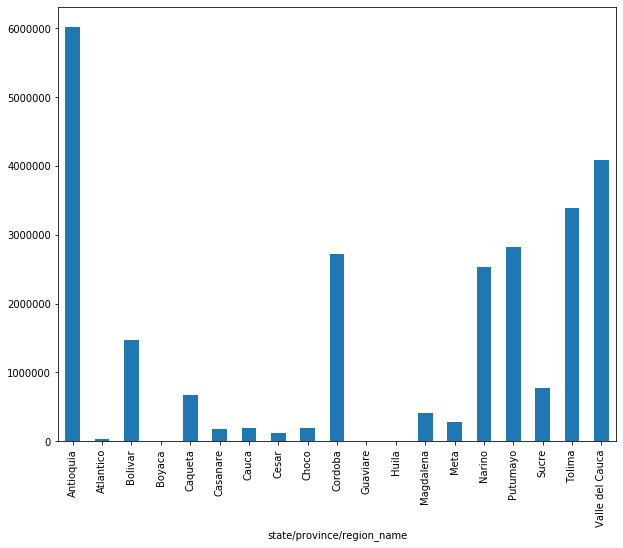

In [0]:

region_plot=df_n.groupby('state/province/region_name')['amount_usd'].sum().plot.bar(figsize=(10,8))
region_plot


In [0]:
#The business sectors 
#
df_n.groupby(['business_sector'])['business_sector'].count().sort_values(ascending = False)

business_sector
Agriculture              10537
Other Service             5033
Trade/Commerce            1386
Fisheries/Aquaculture      503
Manufacturing               95
Forestry/Wood               14
Construction                10
Transportation               2
Energy                       1
Name: business_sector, dtype: int64

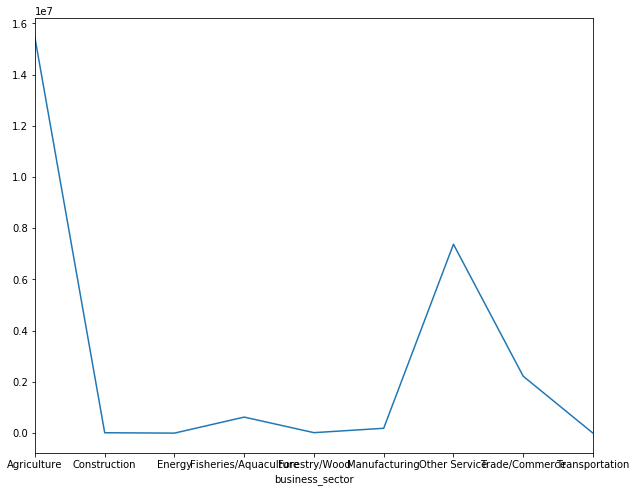

In [0]:
sector_plot=df_n.groupby('business_sector')['amount_usd'].sum().plot(figsize=(10,8))
sector_plot

# KINYA

In [0]:
#First time borrower or not?
#
df_n.groupby(['is_first_time_borrower?'])['is_first_time_borrower?'].count().sort_values(ascending = False)

is_first_time_borrower?
1.0    17563
0.0       18
Name: is_first_time_borrower?, dtype: int64

In [0]:
#Woman owned or not?
#
df_n.groupby(['is_woman_owned?'])['is_woman_owned?'].count().sort_values(ascending = False)

is_woman_owned?
0    10418
1     7163
Name: is_woman_owned?, dtype: int64

In [0]:
#Disbursment period
#
df_n['duration'] = (pd.to_datetime(df_n.end_date) - pd.to_datetime(df_n.disbursement_date)) 


In [0]:
#Max disbursement period 
#
df_n['duration'].max()

Timedelta('1896 days 00:00:00')

In [0]:
#Minimum period of disbursement
#
df_n['duration'].min()

Timedelta('3 days 00:00:00')

In [0]:
#Average duration of disbursement
df_n['duration'].mean()

Timedelta('712 days 17:56:00.423184')